In [1]:
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
X = mnist["data"]
y = mnist["target"]

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
modelo_dt = tree.DecisionTreeClassifier(criterion = 'entropy')
modelo_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [7]:
predicao = modelo_dt.predict(X_test)
print(predicao)

['8' '4' '9' ... '2' '7' '1']


[[1240    0   15    7    3   13   25    7   18   15]
 [   0 1540    7   10    4    6    2   14   13    4]
 [  11   20 1186   37   18   12   24   33   26   13]
 [   7    8   42 1208    6   58    9   25   48   22]
 [   6    3   16    6 1127   13   14   16   22   72]
 [  14   10   11   64   17 1051   30    5   46   25]
 [  11    7   20    5   20   29 1266    5   28    5]
 [   5   11   37   13   13    8    2 1367    8   39]
 [   7   20   28   48   31   28   25   20 1120   30]
 [   6    8   12   21   72   35    6   21   27 1212]]


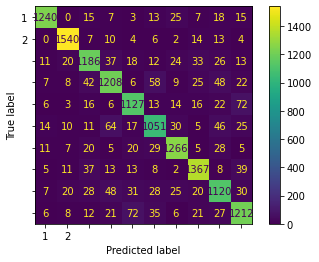

In [8]:
matriz_confusao = confusion_matrix(y_test, predicao)
print(matriz_confusao)

matriz_confusao_visual = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao,display_labels = np.array([1,2]))
matriz_confusao_visual.plot();

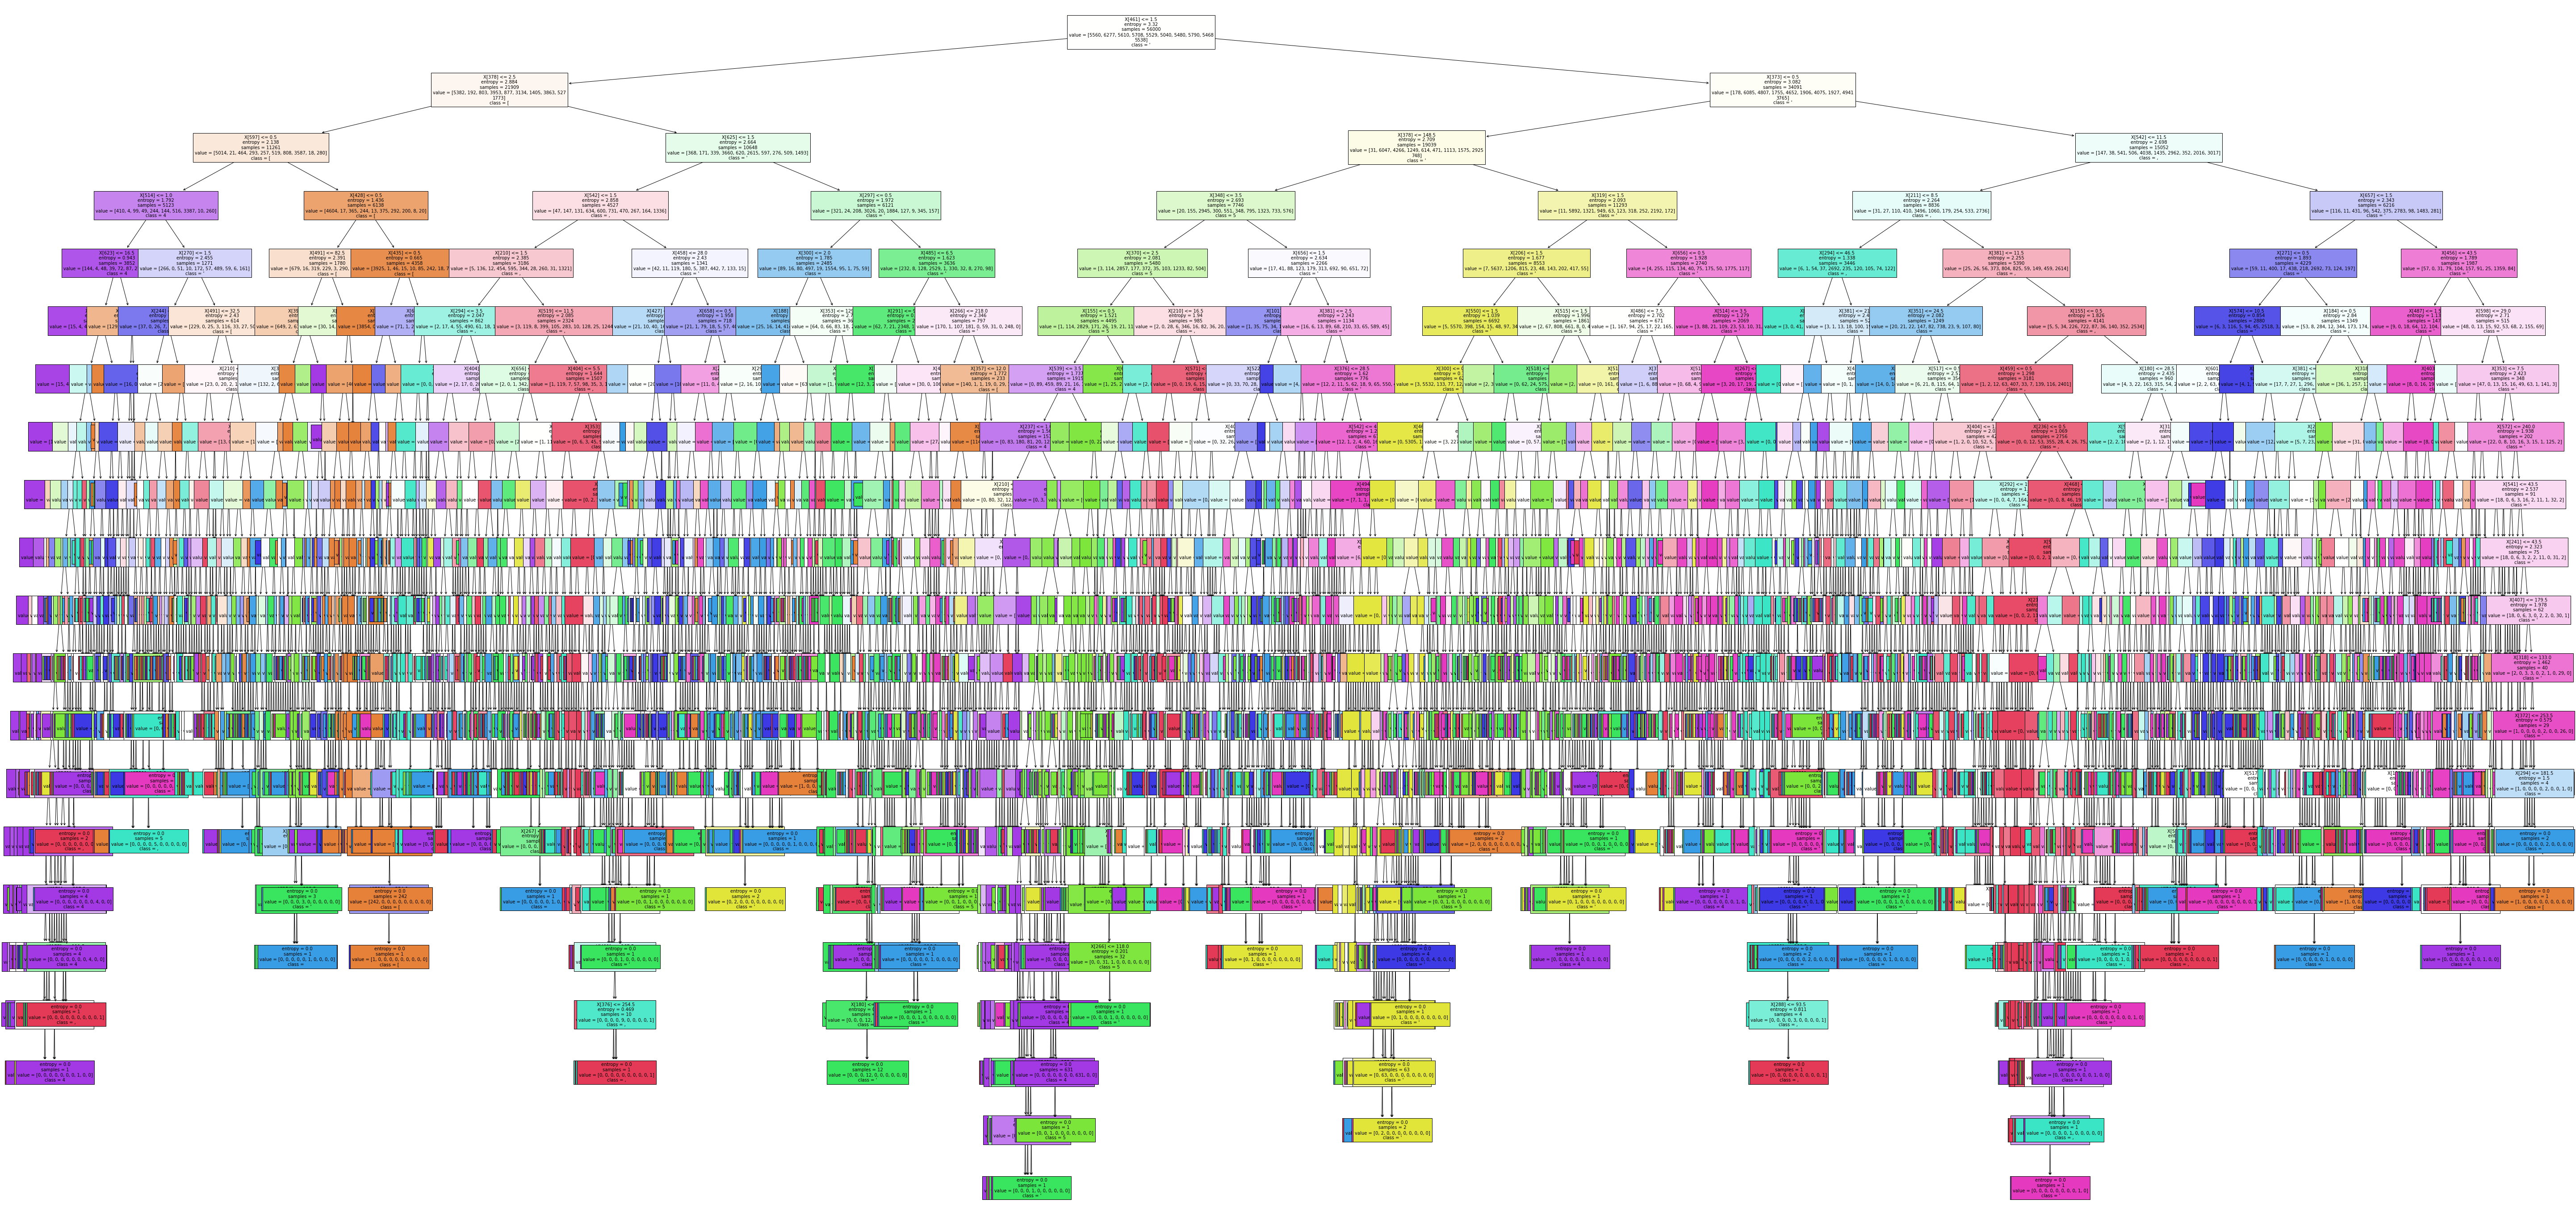

In [10]:
plt.figure(figsize=(100,50))
tree.plot_tree(modelo_dt, class_names=str(y_train.unique()) , filled=True, fontsize=10);
plt.savefig('modelo_dt_mnist.png', dpi=300)